<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [36]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [37]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

In [38]:
# A:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])
boston = pd.concat([y, X], axis = 1)
boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [39]:
# A:
boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [40]:
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [41]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MEDV     506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    float64
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    float64
 10  TAX      506 non-null    float64
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

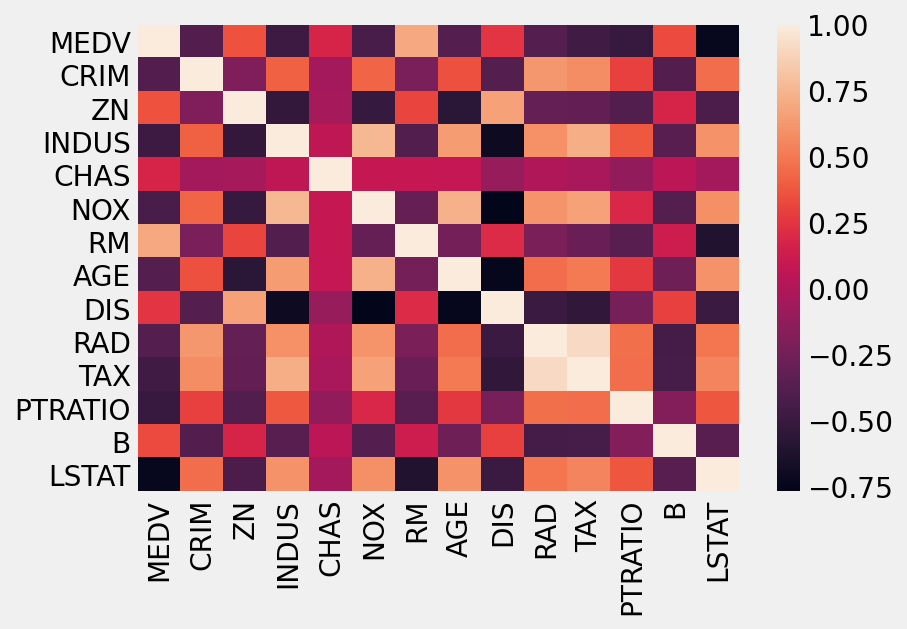

In [42]:
sns.heatmap(boston.corr())
#RM, #LSTAT, #AGE, #TAX

In [43]:
# A:
# create feature matrix (X)
feature_cols = ['RM', 'LSTAT', 'AGE', 'TAX']
X = boston[feature_cols]
# create response vector (y)
y = boston.MEDV

In [73]:
linreg = LinearRegression()
linreg.fit(X, y)

print('y intercept is:{}'.format(linreg.intercept_))
print('slope coeff is:{}'.format(linreg.coef_))
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=60)
    
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
    
print("root mean squared error is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("mean squared error is: ", mean_squared_error(y_test, y_pred))
print('r2 score is:', linreg.score(X_test, y_test))

y intercept is:0.04628170728800285
slope coeff is:[ 5.03552364 -0.6021222   0.02138562 -0.0073676 ]
root mean squared error is:  5.921292356536343
mean squared error is:  35.06170317157572
r2 score is: 0.5615070388015385


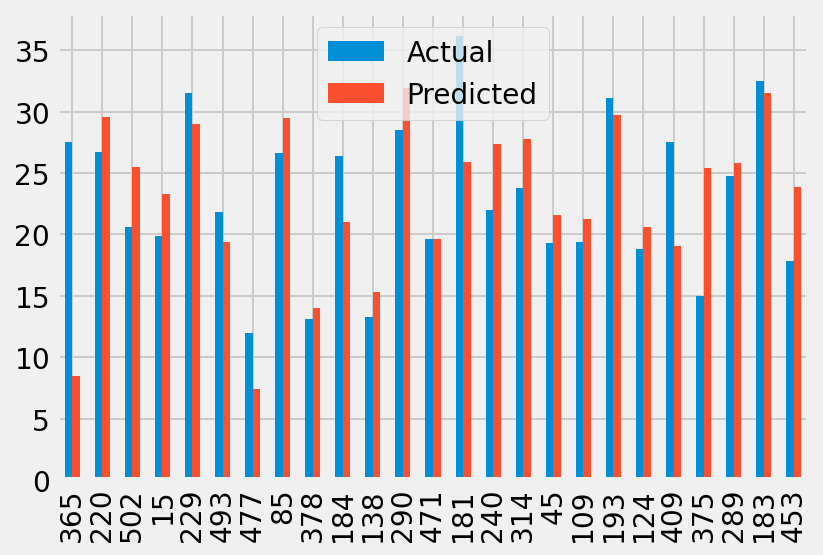

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25).plot(kind = 'bar')

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [74]:
# A:
linreg = LinearRegression()
linreg.fit(X, y)

print('y intercept is:{}'.format(linreg.intercept_))
print('slope coeff is:{}'.format(linreg.coef_))
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=60)
    
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
    
print("root mean squared error is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("mean squared error is: ", mean_squared_error(y_test, y_pred))
print('r2 score is:', linreg.score(X_test, y_test))

y intercept is:0.04628170728800285
slope coeff is:[ 5.03552364 -0.6021222   0.02138562 -0.0073676 ]
root mean squared error is:  5.579116685366207
mean squared error is:  31.126542988931618
r2 score is: 0.6288623865400242


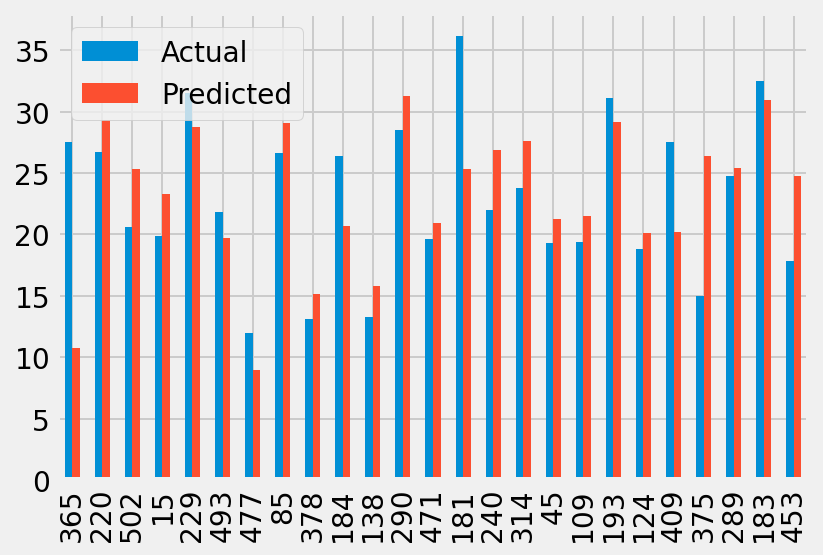

In [47]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25).plot(kind = 'bar')

In [80]:
linreg = LinearRegression()
linreg.fit(X, y)

print('y intercept is:{}'.format(linreg.intercept_))
print('slope coeff is:{}'.format(linreg.coef_))
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=60)
    
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
    
print("root mean squared error is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("mean squared error is: ", mean_squared_error(y_test, y_pred))
print('r2 score is:', linreg.score(X_test, y_test))

y intercept is:0.04628170728800285
slope coeff is:[ 5.03552364 -0.6021222   0.02138562 -0.0073676 ]
root mean squared error is:  5.303221620343114
mean squared error is:  28.124159554474648
r2 score is: 0.3672736235182926


In [83]:
#from yellowbrick.regressor import ResidualsPlot


In [84]:
#model = LinearRegression()
#visualizer = ResidualsPlot(model)

#visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
#visualizer.show()                 # Finalize and render the figure


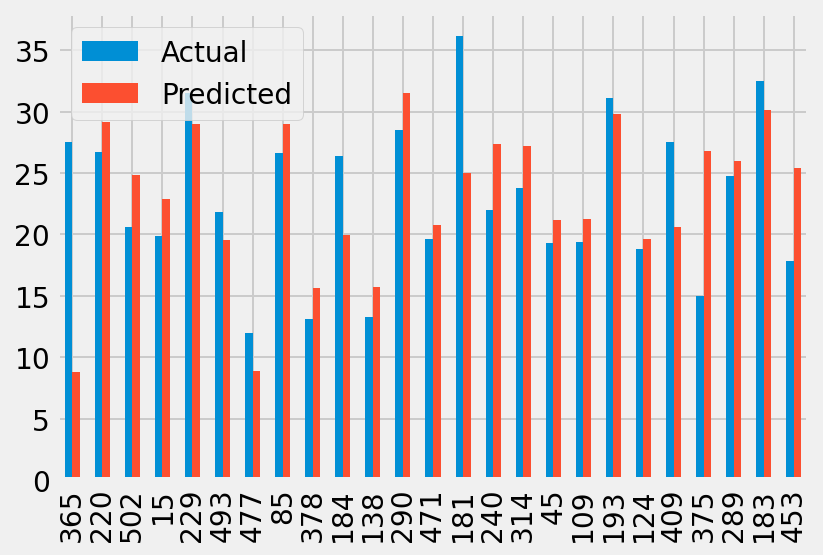

In [49]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25).plot(kind = 'bar')

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [76]:
# A:

feature_cols = ['RM', 'LSTAT', 'AGE', 'TAX']
X = boston[feature_cols]
# create response vector (y)
y = boston.MEDV

for n in range(5,11):
    lr = LinearRegression()
    kf = KFold(n_splits = n, shuffle = True, random_state = 42)
    print('R2 for {} folds is {}'.format(n, np.mean(cross_val_score(lr, X, y, cv=kf)))) 


R2 for 5 folds is 0.633827890211647
R2 for 6 folds is 0.6352786410900207
R2 for 7 folds is 0.6342607722785683
R2 for 8 folds is 0.6331147052432439
R2 for 9 folds is 0.6206008384185068
R2 for 10 folds is 0.633249569185807


### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [8]:
# A:

### 5.1 Can you explain what could be wrong with this approach?

In [9]:
# A:

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [10]:
import patsy

# A: